# Predicting Disaster Results!

We are going to use machine learning to predict whether or not passengers survived the Titanic crash! We will use known information about the passengers as the feature set (**X variables**) and the **binary feature** 'Survived' to classify whether or not the passenger survived the accident.

We will use two different models to complete these predictions:
- K Nearest Neighbors (KNN)
- Decision Tree
- Random Forest


The data is sourced from the Kaggle Completition: Titanic: Machine Learning from Disaster

To see other examples of data cleaning, analysis, & modeling of this data, follow this link: https://www.kaggle.com/c/titanic

## Data Dictionary

Your dataset may come with dictionary. The dictionary for the Titanic dataset is below. It provides a definition for each feature and a key for the categorical features.

| Field | Definition | Key |
|------|------|------|
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex |
| age | Age in years |
|sibsp| # of siblings / spouses aboard the Titanic |
|parch|# of parents / children aboard the Titanic|
|ticket|Ticket number|
|fare|	Passenger fare|
|cabin|	Cabin number|
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

## K Nearest Neighbors (KNN) Model

Our problem is to predict whether a passenger will survive the Titanic disaster given some personal data and information about their trip. To start, we will classify the passenger survivor outcomes by creating a KNN model. 

**The Model Components:**
- **Target Variable:** 'survival'
- **Features:** 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'

**Bootcamp Modeling Process:**
1. Load packages
2. Load training data
3. Review initial training data & features
4. Clean Data / Create Data Pipeline
5. Load test data / apply data pipeline to test data
6. Split training dataset
7. Fit KNN Model
8. Test model
9. Evaluate model

**1. Load Packages**

Packages for working with / modifying / preprocessing **data**

In [1]:
import numpy as np #Numpy for working with your data as an array
import pandas as pd #Pandas for working with your data as a dataframe
from sklearn import preprocessing #preprocessing is used to normalize the data
from sklearn.model_selection import train_test_split #train test split is used for preprocessing

Packages for **visualization**

In [2]:
from matplotlib import pyplot as plt #matplotlib for visualization functions 
import seaborn as sns #seaborn for visualization functions

Packages for **modeling**: used to create models from testing data & defining model hyperparameters

In [3]:
from sklearn.tree import DecisionTreeClassifier #DecisionTreeClassifier is the decision tree classification function
from sklearn.ensemble import RandomForestClassifier #RandomForestClassifier is the random forest classification functionality
from sklearn.neighbors import KNeighborsClassifier #KNeighborsClassifier is the KNN classification functionality

Packages for **evaluating** Model Results

In [4]:
from sklearn import metrics #metrics allows us to prints the model's accuracy score
from sklearn.metrics import confusion_matrix #confusion_matrix allows us to print accuracy details about our model

**2. Load training data**

In [5]:
df = pd.read_csv('train.csv')

**3. Review initial training data & features**

This data is used to predict whether breast cancer is malignant or benign. We will look further into some of the features in the dataset before building our KNN mdeol. 

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Review the Numerical Features**

A flag on 0 means that the passenger survived the trip of the titanic

In [9]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

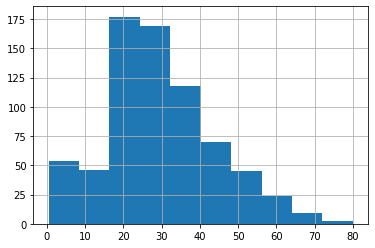

In [12]:
#It will be easier to look at this distribution using a histogram!
df.Age.hist()

In [13]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [14]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [15]:
df.Fare.value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

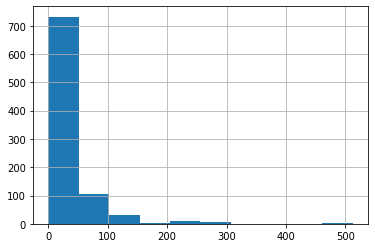

In [16]:
#Take a look at the distribution
df.Fare.hist()

In [17]:
#Review the summary statistics
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

**Identify Two Features to use to predict whether a passenger will survive.** <br> The below scatterplots compare different features so that we can start evaluating their relationships with each other and our target feature, **survived**

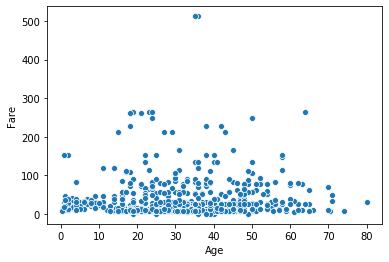

In [31]:
sns.scatterplot(
    x='Age',
    y='Fare',
    data=df)

Include the target feature as the **hue** and look for patterns

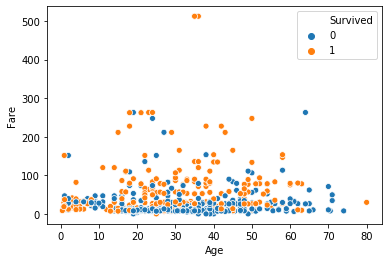

In [33]:
sns.scatterplot(
    x='Age',
    y='Fare',
    hue='Survived',
    data=df
)

**In Class Activity**

Using the features in the X dataframe **df**, create a scatterplot comparing the two features that you want to use to predict whether the cancer or benign. Select from the features output by the cell below. You can recreate the scatterplot using the code from the cell above.

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
## Put scatterplot code in this cell

**Review Categorical Data**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [21]:
df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [22]:
df.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
5                330877
6                 17463
7                349909
8                347742
9                237736
10              PP 9549
11               113783
12            A/5. 2151
13               347082
14               350406
15               248706
16               382652
17               244373
18               345763
19                 2649
20               239865
21               248698
22               330923
23               113788
24               349909
25               347077
26                 2631
27                19950
28               330959
29               349216
             ...       
861               28134
862               17466
863            CA. 2343
864              233866
865              236852
866       SC/PARIS 2149
867            PC 17590
868              345777
869              347742
870              349248
871             

In [23]:
df.Cabin.value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
C22 C26            3
F33                3
D                  3
E101               3
F2                 3
C123               2
B58 B60            2
B77                2
D35                2
D20                2
B57 B59 B63 B66    2
B20                2
D36                2
E24                2
F4                 2
E67                2
D33                2
E121               2
B51 B53 B55        2
C52                2
C125               2
B18                2
E44                2
B5                 2
E33                2
C68                2
D17                2
                  ..
B102               1
C49                1
D37                1
C85                1
D7                 1
E36                1
A14                1
E17                1
E12                1
A24                1
B86                1
C47                1
D6                 1
C91                1
E58                1
C101               1
A31          

In [24]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [25]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**4. Clean Data / Create Data Pipeline**

Clean Null Values

In [26]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head()

,Missing Ratio
Cabin,77.104377
Age,19.865320
Embarked,0.224467


**Drop features that are missing too much information**

In [27]:
df = df.drop(['Cabin'], axis=1)

**Drop features that will not add value**

In [28]:
df = df.drop(['Name'], axis=1)

In [29]:
df = df.drop(['Ticket'], axis=1)

**Fill empty values in the Age feature**

In [30]:
df['Age'].fillna(df['Age'].median(), inplace=True)

**Fill empty values in the Emarked feature**

In [31]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

**Verify that all nulls are filled**

In [32]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head()

,Missing Ratio


**Convert Sex & Embarked to numeric values**

In [33]:
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [34]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

**All features are now numeric**

The K Nearest Neighbor model requires numeric data

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null int64
dtypes: float64(2), int64(7)
memory usage: 62.7 KB


**5. Load test data / apply data pipeline to test data**

In [88]:
df_test = pd.read_csv('test.csv')

In [89]:
df_test = df_test.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Name'], axis=1)
df_test = df_test.drop(['Ticket'], axis=1)
df_test['Fare'].fillna(df_test['Age'].median(), inplace=True)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)

In [90]:
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1}).astype(int)
df_test['Embarked'] = df_test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [91]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int64
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


**Isolate the X & Y Features in the training and test datasets**

Define the features that you want to model

In [40]:
df_train = df

In [41]:
df_train = df

In [42]:
features = ['Age', 'Fare', 'Sex', 'Embarked']

In [43]:
X = df_train[features]

In [44]:
y = df_train['Survived']

**Normalize the Feature Set**

In [45]:
X = preprocessing.StandardScaler().fit_transform(X)

In [46]:
X

array([[-0.56573646, -0.50244517,  0.73769513, -0.56883712],
       [ 0.66386103,  0.78684529, -1.35557354,  1.00518113],
       [-0.25833709, -0.48885426, -1.35557354, -0.56883712],
       ...,
       [-0.1046374 , -0.17626324, -1.35557354, -0.56883712],
       [-0.25833709, -0.04438104,  0.73769513,  1.00518113],
       [ 0.20276197, -0.49237783,  0.73769513,  2.57919938]])

**6. Split training dataset**

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

**7. Fit KNN Model**

We need to determine how many neighbors using the **KNeighborsClassifier()** function. 

In [48]:
test_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [49]:
test_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**8. Test model**

In [50]:
test_yhat = test_knn.predict(X_test)

In [51]:
test_yhat

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1])

**9. Evaluate model**

**Create a Confusion Matrix**

This will allow us to compare the results of our model to the actual results

In [52]:
test_confusion = confusion_matrix(y_test, test_yhat)

In [53]:
test_confusion

array([[91, 25],
       [19, 44]])

In [54]:
pd.DataFrame(confusion_matrix(y_test, test_yhat, labels = [0, 1]), 
             columns = ['Predicted Positive','Predicted Negative']
            ).rename(index = {0:'True Positive',1:'True Negative'})

,Predicted Positive,Predicted Negative
True Positive,91,25
True Negative,19,44


**Review the Accuracy Score**

In [55]:
metrics.accuracy_score(y_test, test_yhat)

0.7541899441340782

### In Class Activity
**Can we improve the model through different feature selection?**

The codes creating the KNN model in the previous selection are aggregated in the cells below. Modify the **features** list by:
- Adding a feature or features
- Removing a feature or features
- Swapping on feature for another

When you run the cells, your model's accuracy score will be returned! Can you get an accuracy better than our previoius acccuracy of **.7932?**

Try to only make one change at a time. This way you can see and measure the impact of the change. 

In [56]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [57]:
features = ['Age', 'Fare', 'Sex', 'Embarked']
X = df_train[features]
y = df_train['Survived']
X = preprocessing.StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
test_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
test_yhat = test_knn.predict(X_test)
metrics.accuracy_score(y_test, test_yhat)

0.7318435754189944

**Test / Modify / Tune Model**

In [58]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
yhat = knn.predict(X_test)
confusion = confusion_matrix(y_test, yhat)
print(metrics.accuracy_score(y_test, yhat))
print(confusion)

0.7486033519553073
[[84 22]
 [23 50]]


In [59]:
pd.DataFrame(confusion_matrix(y_test, test_yhat, labels = [0, 1]), 
             columns = ['Predicted Positive','Predicted Negative']
            ).rename(index = {0:'True Positive',1:'True Negative'})

,Predicted Positive,Predicted Negative
True Positive,82,24
True Negative,24,49


In [60]:
knn_10 = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
yhat_10 = knn_10.predict(X_test)
confusion_10 = confusion_matrix(y_test, yhat_10)
print(metrics.accuracy_score(y_test, yhat_10))
print(confusion_10)

0.7374301675977654
[[87 19]
 [28 45]]


In [64]:
pd.DataFrame(confusion_matrix(y_test, yhat_10, labels = [0, 1]), 
             columns = ['Predicted Positive','Predicted Negative']
            ).rename(index = {0:'True Positive',1:'True Negative'})

,Predicted Positive,Predicted Negative
True Positive,87,19
True Negative,28,45


In [65]:
knn_20 = KNeighborsClassifier(n_neighbors=20).fit(X_train, y_train)
yhat_20 = knn_20.predict(X_test)
confusion_20 = confusion_matrix(y_test, yhat_20)
print(metrics.accuracy_score(y_test, yhat_20))
print(confusion_20)

0.7318435754189944
[[84 22]
 [26 47]]


In [66]:
pd.DataFrame(confusion_matrix(y_test, yhat_20, labels = [0, 1]), 
             columns = ['Predicted Positive','Predicted Negative']
            ).rename(index = {0:'True Positive',1:'True Negative'})

,Predicted Positive,Predicted Negative
True Positive,84,22
True Negative,26,47


## Define Final Model

In [67]:
knn_final = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

## Make Final Predictions
Use the Test dataset to make final predictions

In [68]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,2
1,893,3,0,47.0,1,0,7.0000,0
2,894,2,1,62.0,0,0,9.6875,2
3,895,3,1,27.0,0,0,8.6625,0
4,896,3,0,22.0,1,1,12.2875,0


**Preprocessing**

In [93]:
features = ['Age', 'Fare', 'Sex', 'Embarked']
X = df_test[features]

In [95]:
yhat = knn_final.predict(X)

**Review Results**

In [108]:
df_test['Results'] = pd.DataFrame(yhat, columns = ['Results'])

In [109]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Results,Results1
0,892,3,1,34.5,0,0,7.8292,2,0,0
1,893,3,0,47.0,1,0,7.0000,0,0,0
2,894,2,1,62.0,0,0,9.6875,2,0,0
3,895,3,1,27.0,0,0,8.6625,0,0,0
4,896,3,0,22.0,1,1,12.2875,0,1,1
5,897,3,1,14.0,0,0,9.2250,0,1,1
6,898,3,0,30.0,0,0,7.6292,2,0,0
7,899,2,1,26.0,1,1,29.0000,0,1,1
8,900,3,0,18.0,0,0,7.2292,1,0,0
9,901,3,1,21.0,2,0,24.1500,0,1,1


# Create a Decision Tree to Predict whether a Passenger will Survive

We will use the same dataset with a different approach to predict! Luckily, we have already created a data prep pipeline, so we can use the same methods to prepare our dataset (steps 1:6 in the previous modeling process)

Our problem is to predict whether a passenger will survive the Titanic disaster given some personal data and information about their trip. To start, we will classify the passenger survivor outcomes by creating a Decision Tree model.

**The Model Components:**
- **Target Variable:** 'survival'
- **Features:** 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'

**Bootcamp Modeling Process:**
1. Load packages
2. Load training data
3. Review initial training data & features
4. Clean Data / Create Data Pipeline
5. Load test data / apply data pipeline to test data
6. Split training dataset
7. Fit KNN Model
8. Test model
9. Evaluate model

**Load Packages**

In [111]:
from sklearn.tree import DecisionTreeClassifier

### Data Preprocessing

In [112]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [113]:
df_train = df_train.drop(['Cabin'], axis=1)
df_train = df_train.drop(['Name'], axis=1)
df_train = df_train.drop(['Ticket'], axis=1)
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

In [114]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1}).astype(int)
df_train['Embarked'] = df_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [115]:
df_test = df_test.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Name'], axis=1)
df_test = df_test.drop(['Ticket'], axis=1)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)

In [116]:
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1}).astype(int)
df_test['Embarked'] = df_test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

**Identify Features for Modeling**

In [117]:
features = ['Age', 'Fare', 'Sex', 'Embarked']
X = df_train[features]
y = df_train['Survived']

**We do not need to convert categorical features to numeric for a Random Forest**

The randomn forest algorithm can accept categorical features.

**Split the Training Data**

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Create Initial Model

In [119]:
decision_tree = DecisionTreeClassifier(max_depth = 3)

In [120]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Create Visual of the Decision Tree Model**

To create the below visual, you will need to install the pydotplus package. You can uncomment the cell below to install the package. If this results in an error, run the command in your computer's terminal.

In [121]:
#pip install pydotplus

In [122]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/Users/sarahzeis/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


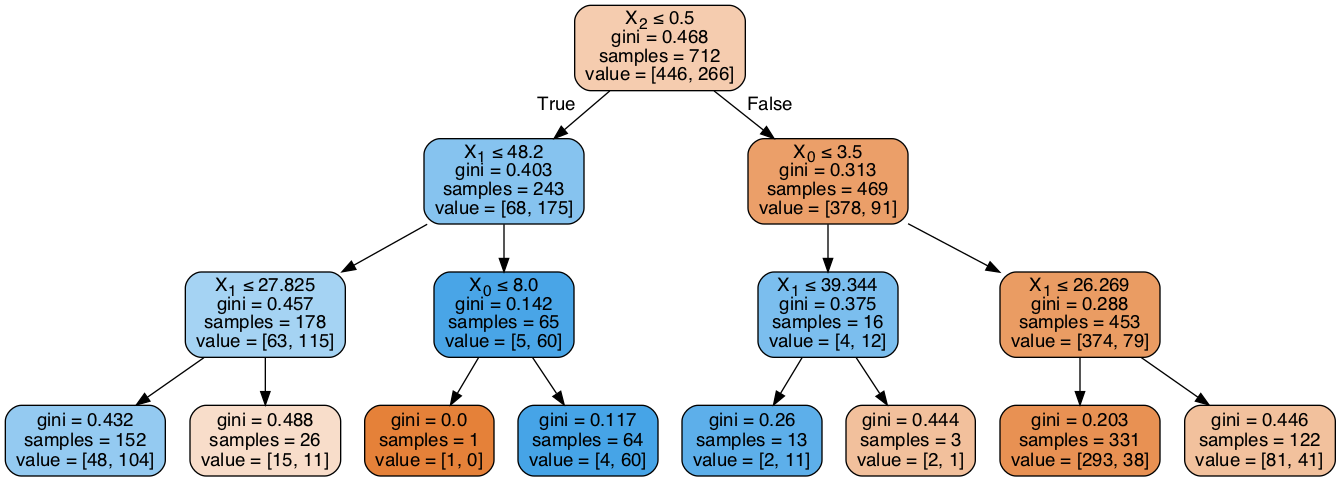

In [123]:
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Predict Initial Results

In [124]:
y_pred = decision_tree.predict(X_test)

### Review Test Results

In [125]:
y_true = np.array(y_test)

**Create Dataframe to Review Individual Results**

In [126]:
pd.DataFrame({'Survived': y_true, 'Predictions': y_pred}, columns=['Survived', 'Predictions'])

,Survived,Predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,1,1


**Create confusion matrix to review overall accuracy**

In [127]:
confusion_matrix(y_true, y_pred, labels = [0, 1])

array([[91, 12],
       [22, 54]])

In [75]:
pd.DataFrame(confusion_matrix(y_true, y_pred, labels = [0, 1]), 
             columns = ['Predicted Positive','Predicted Negative']
            ).rename(index = {0:'True Positive',1:'True Negative'})

,Predicted Positive,Predicted Negative
True Positive,99,16
True Negative,24,40


# Random Forest
Improve the decision tree process by using a decision tree model. 

In [128]:
df_train.shape

(891, 9)

Use the **RandomForestClassifier()** function to make an initial predictor. We will be training our model by modifying the **n_estimators** hyperparameter. To begin testing, we will set n_estimators equal to 50.

In [129]:
random_forest = RandomForestClassifier(n_estimators=50)

In [130]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [131]:
y_pred = random_forest.predict(X_test)

In [132]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0])

In [133]:
random_forest.score(X_train, y_train)

0.9747191011235955

## Try Improving the Model Score by Modifying the Hyperparameter

In [134]:
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

0.9747191011235955

## Make Final Predictions

In [135]:
y_pred = random_forest.predict(X_test)

## Review Results

In [138]:
X_test['results'] = y_pred
X_test

,Age,Fare,Sex,Embarked,results
139,24.0,79.2000,1,1,1
64,28.0,27.7208,1,1,0
168,28.0,25.9250,1,0,0
471,38.0,8.6625,1,0,0
478,22.0,7.5208,1,0,0
50,7.0,39.6875,1,0,1
723,50.0,13.0000,1,0,0
741,36.0,78.8500,1,0,0
758,34.0,8.0500,1,0,0
823,27.0,12.4750,0,0,1
